## Discounted reward

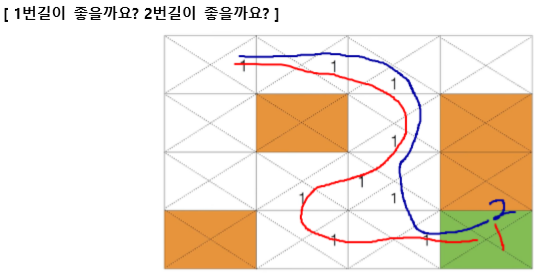

In [1]:
from IPython.display import Image
Image ("C:/Users/user/Pictures/discounted.png")  

아이디어


a. 미래의 reward는 discount

b. 결과적으로 reward를 빨리 받을 수 있는 곳으로 이동하게 함

goal과 맞닿아있는 방향에 reward 1을 얻게되고(reward + max Q(s,a): 다음상태의 Q테이블의 최댓값 = reward:1 + discounted_rate * max Q(s,a):0)  

S10은 S14에 갈수있는 아랫쪽 방향에 reward가 주어지는데, 이때 S14의 reward가 미래의 reward이기때문에 discount한다. discount_rate가 0.9인 경우0.9 * S14의 최댓값(1) = 0.9가 S10의 아랫쪽 reward가 된다 

→ and so on..  

cf. 식에서 r은 이 그 게임이 끝나고 나서 얻을 수 있는 reward를 말한다.


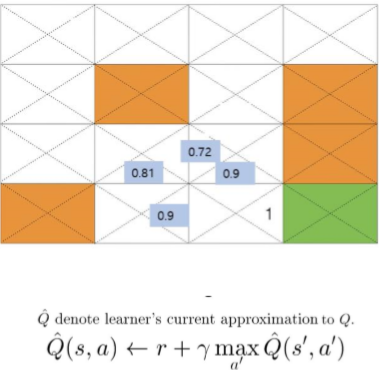

In [2]:
Image ("C:/Users/user/Pictures/discountedreward.png")  

r: 바로 얻을 수 있는 reward
    
max... : 미래의 reward

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

#최대값이 모두 같을 때 random하게 return하도록 작성한 코드.
def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')


# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max (Q [new_state, :])
        state = new_state

        rAll += reward

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()



Success rate: 0.9555
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.         0.9801     0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


<Figure size 640x480 with 1 Axes>